In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import openaq


api = openaq.OpenAQ()

# grab the data
res = api.measurements(city='Delhi', parameter='pm25', limit=1000, df=True, date_from='2018-01-01' )

res.sort_index(inplace=True)

In [73]:
%matplotlib inline

In [74]:
len(res)

1000

In [75]:
res_am_emb = res[res.location=='US Diplomatic Post: New Delhi']

In [76]:
res.head()

,city,coordinates.latitude,coordinates.longitude,country,date.utc,location,parameter,unit,value
date.local,,,,,,,,,
2018-05-12 19:00:00,Delhi,28.651478,77.147311,IN,2018-05-12 13:30:00,"Shadipur, New Delhi - CPCB",pm25,b'\xc2\xb5g/m\xc2\xb3',127.10
2018-05-12 19:00:00,Delhi,28.562776,77.118005,IN,2018-05-12 13:30:00,"IGI Airport Terminal - 3, New Delhi - IMD",pm25,b'\xc2\xb5g/m\xc2\xb3',122.92
2018-05-12 19:00:00,Delhi,28.681174,77.302523,IN,2018-05-12 13:30:00,"IHBAS, Dilshad Garden,New Delhi - CPCB",pm25,b'\xc2\xb5g/m\xc2\xb3',114.50
2018-05-12 19:00:00,Delhi,28.470691,77.109936,IN,2018-05-12 13:30:00,"Aya Nagar, New Delhi - IMD",pm25,b'\xc2\xb5g/m\xc2\xb3',117.55
2018-05-12 19:00:00,Delhi,28.631694,77.249439,IN,2018-05-12 13:30:00,"ITO, New Delhi - CPCB",pm25,b'\xc2\xb5g/m\xc2\xb3',135.00


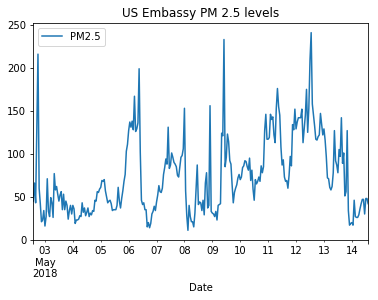

In [61]:
res_am_emb.value.plot(label='PM2.5')
plt.legend()
plt.xlabel("Date")
plt.title("US Embassy PM 2.5 levels")
plt.savefig("pm25timeseries.png")

In [77]:
res.tail()

,city,coordinates.latitude,coordinates.longitude,country,date.utc,location,parameter,unit,value
date.local,,,,,,,,,
2018-05-14 16:00:00,Delhi,28.63576,77.22445,IN,2018-05-14 10:30:00,US Diplomatic Post: New Delhi,pm25,b'\xc2\xb5g/m\xc2\xb3',42.0
2018-05-14 17:00:00,Delhi,28.63576,77.22445,IN,2018-05-14 11:30:00,US Diplomatic Post: New Delhi,pm25,b'\xc2\xb5g/m\xc2\xb3',30.0
2018-05-14 18:00:00,Delhi,28.63576,77.22445,IN,2018-05-14 12:30:00,US Diplomatic Post: New Delhi,pm25,b'\xc2\xb5g/m\xc2\xb3',42.0
2018-05-14 19:00:00,Delhi,28.63576,77.22445,IN,2018-05-14 13:30:00,US Diplomatic Post: New Delhi,pm25,b'\xc2\xb5g/m\xc2\xb3',52.0
2018-05-14 20:00:00,Delhi,28.63576,77.22445,IN,2018-05-14 14:30:00,US Diplomatic Post: New Delhi,pm25,b'\xc2\xb5g/m\xc2\xb3',50.0


 Percentage of `safe` hours

In [62]:
(res_am_emb.value<50).sum()*1./len(res_am_emb)

0.3944636678200692

In [63]:
res_am_emb['hour'] = res_am_emb.index.hour

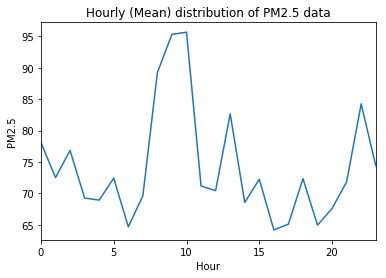

In [64]:
res_am_emb.groupby("hour").mean().value.plot()
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.title("Hourly (Mean) distribution of PM2.5 data")
plt.savefig("pm25hourly.png")

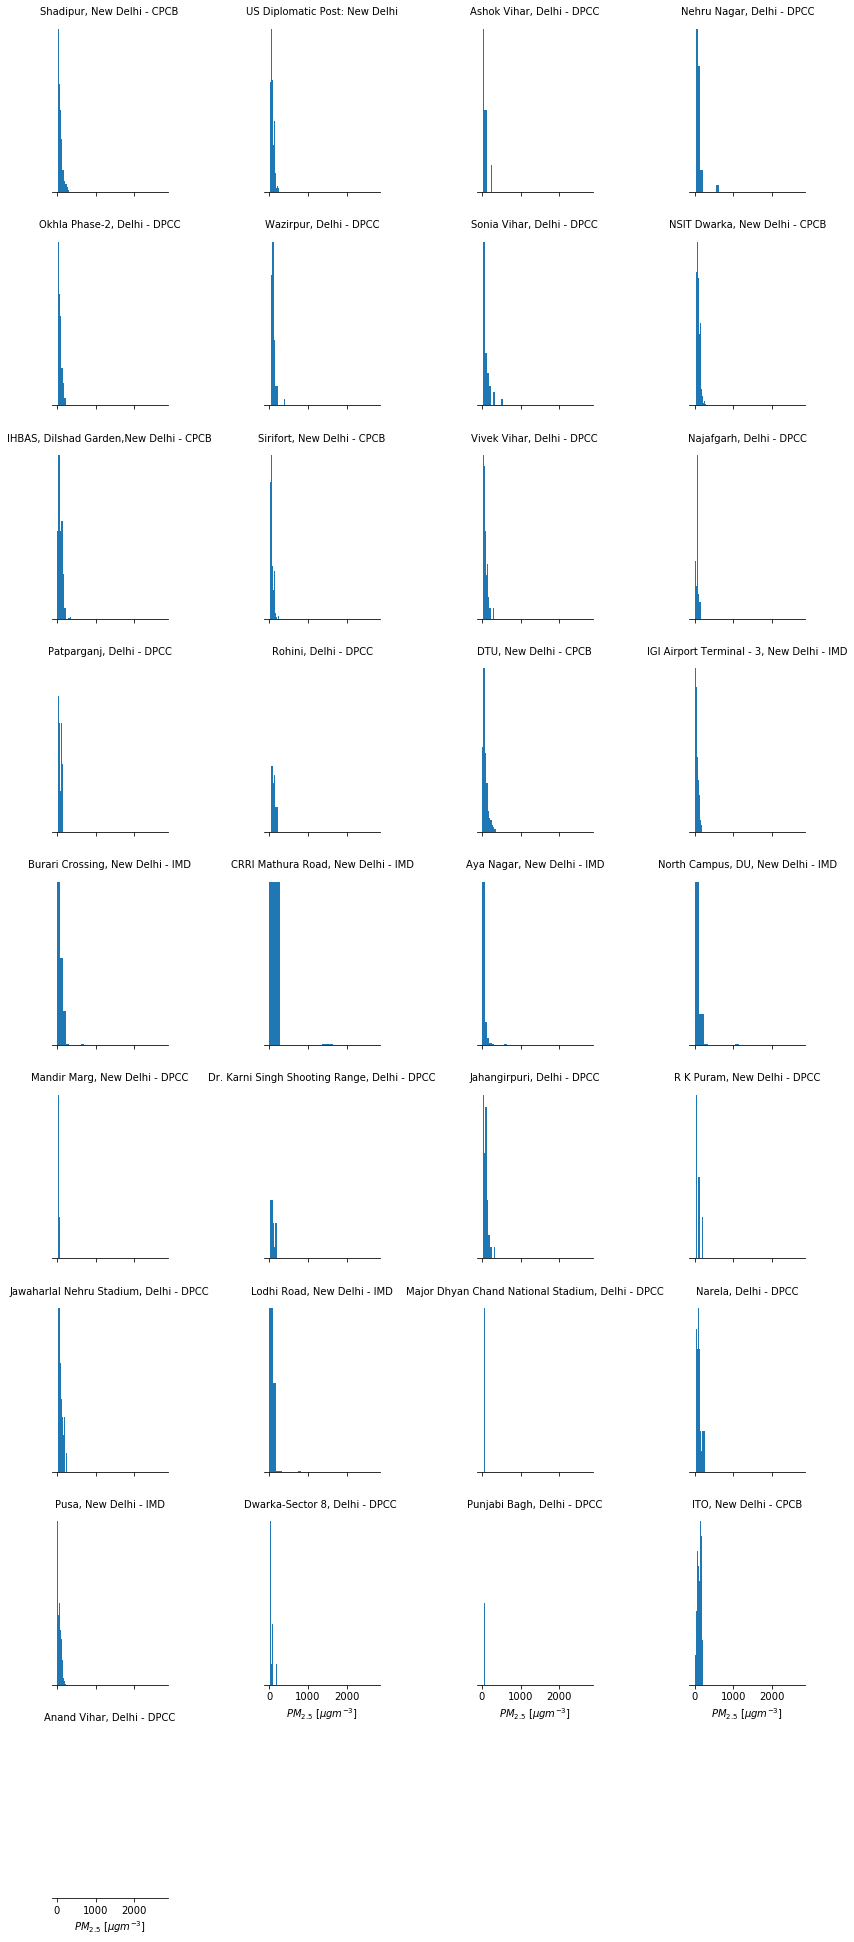

In [4]:
res = res.query("value >= 0.0")

# Setup a FacetGrid
g = sns.FacetGrid(data=res, col='location', col_wrap=4, size=3, sharex=True,
                    sharey=False)

# Map a histogram for each location
g.map(plt.hist, "value")

# Set the titles
g.set_titles("{col_name}")

# Set the axis labels
g.set_axis_labels("$PM_{2.5}$ [$\mu g m^{-3}$]", None)

# Remove the left axis
sns.despine(left=True)

# Remove the yticks
g.set(yticks=[])

In [55]:
import openaq
import folium

api = openaq.OpenAQ()
locs = api.locations(country='CH', df=True)

basemap = folium.Map(location=[locs['coordinates.latitude'].mean(), 
                           locs['coordinates.longitude'].mean()],
                zoom_start=8)

locs.apply(lambda row:	folium.Marker((row['coordinates.latitude'], 
    row['coordinates.longitude']),
     popup = row.to_json()).add_to(basemap),
      axis=1)

basemap.save('airquality.html')

In [56]:
from IPython.display import HTML

In [57]:
HTML('airquality.html')